## This code combines the data of no_filter and besel_filter
    - MSE
    - STD
    - Pred

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [5]:
# read data
mse_ensemble_use_no_filter = pickle.load(open("mse_ensemble_use_no_filter.dat", "rb"))
ensemble_std_use_no_filter = pickle.load(open("ensemble_std_use_no_filter.dat", "rb"))
F_test_rec = pickle.load(open("F_test_rec.dat", "rb"))
ensemble_avrg_use_no_filter = pickle.load(open("ensemble_avrg_use_no_filter.dat", "rb"))
mse_ensemble_use_bessel_filter = pickle.load(open("mse_ensemble_use_bessel_filter.dat", "rb"))
ensemble_std_use_bessel_filter = pickle.load(open("ensemble_std_use_bessel_filter.dat", "rb"))
ensemble_avrg_use_bessel_filter = pickle.load(open("ensemble_avrg_use_bessel_filter.dat", "rb"))

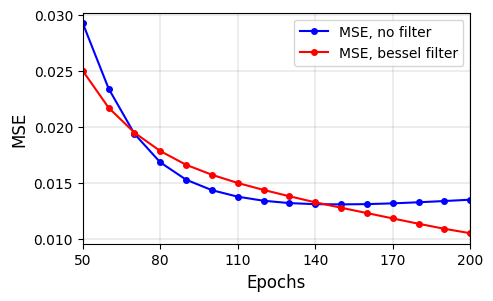

In [53]:
# plot
fig,ax_use = plt.subplots(figsize=(5,3))

neuron_this = 72
layer_this  = 8

ax_use.plot(mse_ensemble_use_no_filter.keys(),mse_ensemble_use_no_filter.values(),
            color='blue', linewidth=1.5,marker='.',markersize=8, label='MSE, no filter')
ax_use.plot(mse_ensemble_use_bessel_filter.keys(),mse_ensemble_use_bessel_filter.values(),
            color='red', linewidth=1.5,marker='.',markersize=8, label='MSE, bessel filter')
ax_use.set_xlim(50,200)
ax_use.set_xticks(np.arange(50,210,30).tolist())
# ax_use.set_ylim(0.012,0.030)
ax_use.grid(color='k', linestyle='-', linewidth=0.1)
ax_use.set_xlabel('Epochs', fontsize=12)
ax_use.set_ylabel('MSE', fontsize=12)
ax_use.legend()

# save figure
fig.savefig('ensemble_error_neuron%d_layer%d.png' % (neuron_this,layer_this), bbox_inches='tight', dpi=300)
fig.savefig('ensemble_error_neuron%d_layer%d.svg' % (neuron_this,layer_this), bbox_inches='tight')

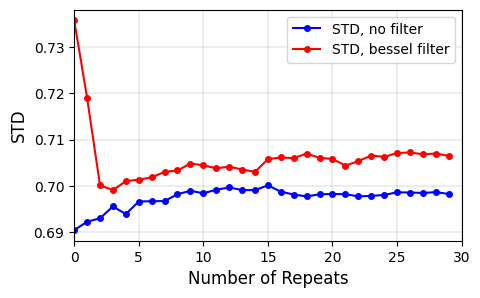

In [54]:
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(ensemble_std_use_no_filter[200],color='blue', linewidth=1.5,marker='.',markersize=8, label='STD, no filter')
ax.plot(ensemble_std_use_bessel_filter[200],color='red', linewidth=1.5,marker='.',markersize=8, label='STD, bessel filter')
ax.grid(color='k', linestyle='-', linewidth=0.1)
ax.set_xlabel('Number of Repeats', fontsize=12)
ax.set_ylabel('STD', fontsize=12)
ax.margins(x=0)
ax.set_xlim(0,30)
ax.legend()

# save figure
fig.savefig('STD_repeat_neuron%d_layer%d.png' % (neuron_this,layer_this), bbox_inches='tight', dpi=300)
fig.savefig('STD_repeat_neuron%d_layer%d.svg' % (neuron_this,layer_this), bbox_inches='tight')

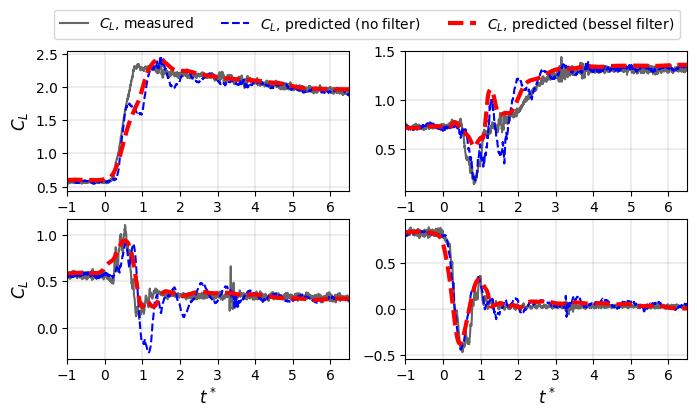

In [58]:
import matplotlib.patches as patches
fig, ax_split = plt.subplots(2,2,figsize=(8,4))
repeat_num = 200 # repeated number: 50 100

T = 0.3 # period is 0.3s
f = 1000 # frequency is 1000Hz
t_star = (np.arange(0,10000) - 500) / f / T 

fig_num = 0 # for count opnly
for i in range(4):
    if fig_num in [0,1]:
        p = 0
        q = fig_num
    else:
        p = 1
        q = fig_num - 2
    ax_split[p,q].plot(t_star[0:2500-1], F_test_rec[0][2500*i:2500*(i+1)-1,:],
                       color='#666666', linewidth=1.5, label='$C_{L}$, measured')
    ax_split[p,q].plot(t_star[0:2500-1], ensemble_avrg_use_no_filter[repeat_num][2500*i:2500*(i+1)-1,-1],
                       color='blue', linewidth=1.5, linestyle='--', label='$C_{L}$, predicted (no filter)')
    ax_split[p,q].plot(t_star[0:2500-1], ensemble_avrg_use_bessel_filter[repeat_num][2500*i:2500*(i+1)-1,-1], 
                       color='red', linewidth=3, linestyle='--', label='$C_{L}$, predicted (bessel filter)',)
    ax_split[p,q].grid(color='k', linestyle='-', linewidth=0.1)
    ax_split[p,q].set_xticks(np.arange(-1,8))
    ax_split[p,q].set_xlim(-1,6.5)
    ax_split[p,q].margins(x=0)
    ax_split[p,q].set_xlabel('$t^*$', fontsize=12)
    fig_num = fig_num + 1
    
# Combine all legends into one figure legend
handles, labels = ax_split[0,0].get_legend_handles_labels()

# Move the legend to the top of the figure
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=10)
    
ax_split[0,0].set_ylabel('$C_{L}$', fontsize=12)
ax_split[1,0].set_ylabel('$C_{L}$', fontsize=12)

fig.savefig('ensemble_pred_neuron%d_layer%d.png' % (neuron_this,layer_this), bbox_inches='tight', dpi=300)
fig.savefig('ensemble_pred_neuron%d_layer%d.svg' % (neuron_this,layer_this), bbox_inches='tight')